# EPSY 5200: Programming for Social Science Researchers
## Week 11
### Wednesday, November 18, 2020

In [1]:
import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
mov = pd.read_csv('in_data/tmdb_5000_movies.csv')

In [ ]:
mov.head()

**Challenge 1**: *Find the descriptive stats for each numeric column.*

In [4]:
# challenge 1 code here
mov.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


**Challenge 2**: *: Find which columns have missing data (and how many missing data)*

In [5]:
# challenge 2 code here
mov.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
mov2 = mov.drop(['homepage', 'tagline'], axis = 1)

In [8]:
mov2.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [9]:
mov3 = mov2.dropna().reset_index(drop=True)

In [10]:
mov3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,4799.0,2.906593e+07,4.073251e+07,0.000000,800000.000000,1.500000e+07,4.000000e+07,3.800000e+08
id,4799.0,5.689992e+04,8.823650e+04,5.000000,9012.500000,1.462300e+04,5.846150e+04,4.470270e+05
popularity,4799.0,2.150988e+01,3.182407e+01,0.000372,4.685547,1.292952e+01,2.835073e+01,8.755813e+02
revenue,4799.0,8.232920e+07,1.629076e+08,0.000000,0.000000,1.918402e+07,9.295652e+07,2.787965e+09
runtime,4799.0,1.069031e+02,2.256131e+01,0.000000,94.000000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4799.0,6.094186e+00,1.188340e+00,0.000000,5.600000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4799.0,6.907891e+02,1.234942e+03,0.000000,54.000000,2.360000e+02,7.375000e+02,1.375200e+04


In [11]:
mov4 = mov3[(mov3.budget > 0) & (mov3.revenue > 0)]

In [12]:
mov4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,3229.0,4.065444e+07,4.439674e+07,1.000000,1.050000e+07,2.500000e+07,5.500000e+07,3.800000e+08
id,3229.0,4.478071e+04,7.460943e+04,5.000000,4.958000e+03,1.145100e+04,4.527200e+04,4.178590e+05
popularity,3229.0,2.903369e+01,3.616573e+01,0.019984,1.044672e+01,2.041035e+01,3.733572e+01,8.755813e+02
revenue,3229.0,1.212430e+08,1.863029e+08,5.000000,1.700000e+07,5.518472e+07,1.462920e+08,2.787965e+09
runtime,3229.0,1.107244e+02,2.096569e+01,41.000000,9.600000e+01,1.070000e+02,1.210000e+02,3.380000e+02
vote_average,3229.0,6.309353e+00,8.738911e-01,0.000000,5.800000e+00,6.300000e+00,6.900000e+00,8.500000e+00
vote_count,3229.0,9.772874e+02,1.414310e+03,0.000000,1.780000e+02,4.710000e+02,1.148000e+03,1.375200e+04


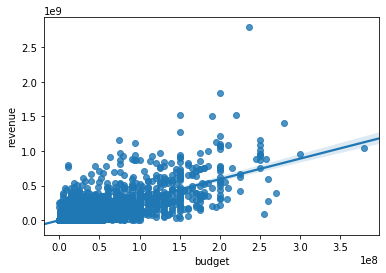

In [13]:
sns.regplot(mov4.budget, mov4.revenue)

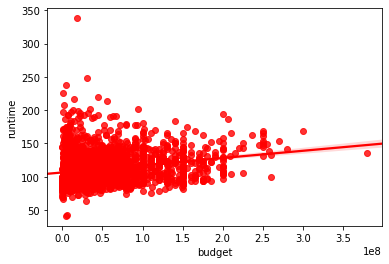

In [23]:
sns.regplot(mov4.budget, mov4.runtime, color = "red")

In [17]:
lm = smf.ols(formula = "revenue ~ budget", data = mov4).fit()

In [24]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_mode

In [21]:
lm.params

Intercept    902540.953295
budget            2.960080
dtype: float64

In [20]:
lm.conf_int()

,0,1
Intercept,-5.277035e+06,7.082117e+06
budget,2.857418e+00,3.062742e+00


In [30]:
lm.pvalues['budget']

0.0

In [31]:
lm.rsquared

0.4975882157211656

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3196.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:05:35   Log-Likelihood:                -64959.
No. Observations:                3229   AIC:                         1.299e+05
Df Residuals:                    3227   BIC:                         1.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.025e+05   3.15e+06      0.286      0.775   -5.28e+06    7.08e+06
budget         2.9601      0.052     56.533      0.000       2.857       3.063
==============================================================================
Omnibus:                     2528.122   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129017.819
Skew:                           3.276   Prob(JB):                         0.00
Kurtosis:                      33.266   Cond. No.                     8.16e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
preds = pd.DataFrame({'budget': [10000, 50000]})
preds

,budget
0,10000
1,50000


In [34]:
lm.predict(preds)

0    9.321418e+05
1    1.050545e+06
dtype: float64